# Exploratory Data Analysis on England CO2 Emission
We will explore CO2 Emission data from 2005-2014 to see yearly trend on Emission per Capita, source of the pollution and city emission distribution.

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [15]:
# Connect data
df = pd.read_csv('/Users/haribudiarto/Documents/Works/Data Works/CO2 Emission.csv')
# Preview data
df.head()

,Year,City,Pollution_Domestic,Pollution_Transport,Pollution_Industry&Commercial,Pollution_Land Change,Total_Pollution,Population,Emission per Capita
0,2005,City of London,20.346117,65.342341,1546.381669,0.064728,1632.134854,7131,0.228879
1,2005,Barking and Dagenham,345.889363,188.344408,396.223474,0.784929,931.242174,166275,0.005601
2,2005,Barnet,868.081256,432.541674,460.475157,2.860712,1763.958800,327541,0.005385
3,2005,Bexley,531.027375,266.765738,485.075284,2.133530,1285.001927,222391,0.005778
4,2005,Brent,616.457177,267.398053,542.962594,1.173763,1427.991587,270939,0.005271


In [16]:
# Remove space from column name, remove NA, and convert column names to lower
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
df.columns = df.columns.str.lower()
df = df.dropna()
df.head()

,year,city,pollution_domestic,pollution_transport,pollution_industry&commercial,pollution_land_change,total_pollution,population,emission_per_capita
0,2005,City of London,20.346117,65.342341,1546.381669,0.064728,1632.134854,7131,0.228879
1,2005,Barking and Dagenham,345.889363,188.344408,396.223474,0.784929,931.242174,166275,0.005601
2,2005,Barnet,868.081256,432.541674,460.475157,2.860712,1763.958800,327541,0.005385
3,2005,Bexley,531.027375,266.765738,485.075284,2.133530,1285.001927,222391,0.005778
4,2005,Brent,616.457177,267.398053,542.962594,1.173763,1427.991587,270939,0.005271


In [17]:
# Check numerical data cleanliness
df.describe()

,year,pollution_domestic,pollution_transport,pollution_industry&commercial,pollution_land_change,total_pollution,population,emission_per_capita
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,4.200000e+02,420.000000
mean,2009.500000,3105.395995,2754.259072,4382.337173,-48.532885,10193.459355,1.439250e+06,0.010591
std,2.875707,5339.931973,5140.079528,7538.275155,470.591074,17660.856233,2.430086e+06,0.030698
min,2005.000000,16.507568,50.483644,182.715315,-3067.455074,643.788244,7.131000e+03,0.002826
25%,2007.000000,415.572189,187.744199,318.558043,0.553246,1025.214939,2.209272e+05,0.004334
50%,2009.500000,503.220970,279.261899,536.417403,0.959605,1409.908741,2.660410e+05,0.005299
75%,2012.000000,779.124563,430.720948,1586.339753,1.830155,2320.623248,3.422120e+05,0.007183
max,2014.000000,20853.057880,21655.469080,27934.773550,602.590286,67096.079000,8.873818e+06,0.243357


In [18]:
# Check categorical data cleanliness to see any error/typo in categorization
df_cat = df.select_dtypes(exclude=['int', 'float'])
for col in df_cat.columns:
    print(df_cat[col].unique()) # to print categories name only
    print(df_cat[col].value_counts()) # to print count of every category

['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich'
 'Hammersmith and Fulham' 'Hackney' 'Haringey' 'Harrow' 'Havering'
 'Hillingdon' 'Hounslow' 'Islington' 'Kensington and Chelsea'
 'Kingston upon Thames' 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge'
 'Richmond upon Thames' 'Southwark' 'Sutton' 'Tower Hamlets'
 'Waltham Forest' 'Wandsworth' 'Westminster' 'North East' 'North West'
 'Yorkshire and the Humber' 'East Midlands' 'West Midlands' 'East'
 'London' 'South East' 'South West']
City of London              10
Wandsworth                  10
Merton                      10
Newham                      10
Redbridge                   10
Richmond upon Thames        10
Southwark                   10
Sutton                      10
Tower Hamlets               10
Waltham Forest              10
Westminster                 10
Barking and Dagenham        10
North East                  10
North West                  1

In [20]:
# Grouping Emission per Capita per Year
df_temp1 = df.groupby(by=['year'],as_index=False)[['total_pollution','population']].sum()
df_temp1['emission_per_capita'] = df_temp1['total_pollution']/df_temp1['population']*1000 # Convert from kiloton to ton
df_temp1.head()

,year,total_pollution,population,emission_per_capita
0,2005,478689.821503,58125043,8.235518
1,2006,477737.150045,58563011,8.157660
2,2007,467083.005291,59074566,7.906668
3,2008,456311.471693,59628014,7.652636
4,2009,411880.358436,60138975,6.848809


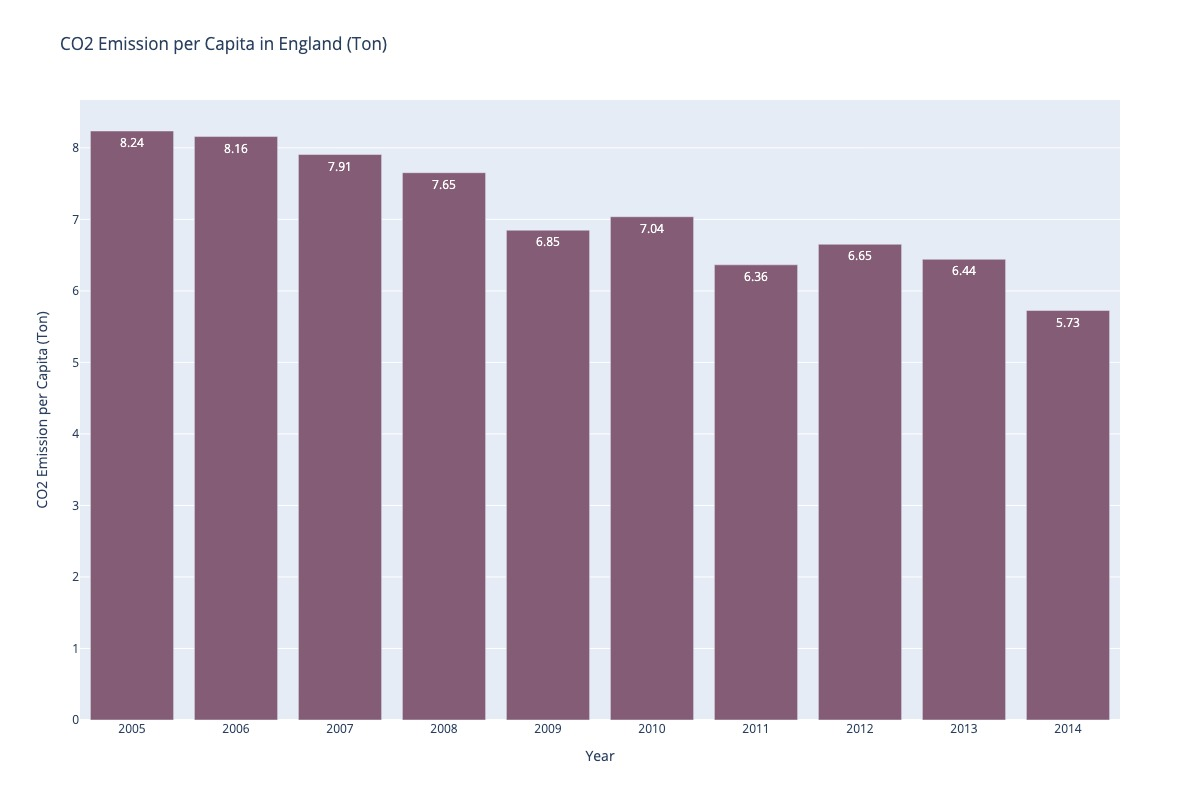

In [56]:
# Visualizing Emission per Capita & Year
df_temp1['epc_round'] = df_temp1['emission_per_capita'].round(2)
fig = px.bar(df_temp1, x = 'year', y = 'emission_per_capita', text='epc_round', 
             color_discrete_sequence=px.colors.qualitative.Antique,title = "CO2 Emission per Capita in England (Ton)")
fig.update_xaxes(type='category',title='Year')
fig.update_yaxes(title='CO2 Emission per Capita (Ton)')
fig.show('jpg',width=1200,height=800)

TAKEAWAYS:
- England's Emission per Capita from 2005 to 2014 had decreased 30%.
- Biggest decrement happen in 2009 with 0.8 ton per capita decreased.

In [27]:
# Grouping Emission per Capita, Year, and Pollution Source
df_temp2 = df.melt(id_vars=['year','population'], value_vars=['pollution_domestic',
                      'pollution_transport',
                      'pollution_industry&commercial',
                      'pollution_land_change'])
df_temp2 = df_temp2.groupby(by=['year','variable'],as_index=False).sum()
df_temp2['emission_per_capita_per_variable'] = df_temp2['value']/df_temp2['population']*1000 # Convert from kiloton to ton 
df_temp2 = df_temp2.rename(columns={'variable': 'Pollution Sources'})
df_temp2['Pollution Sources'] = df_temp2['Pollution Sources'].str[10:]
df_temp2.head()

,year,Pollution Sources,population,value,emission_per_capita_per_variable
0,2005,domestic,58125043,144044.642413,2.478186
1,2005,industry&commercial,58125043,211285.608551,3.635019
2,2005,land_change,58125043,-878.892452,-0.015121
3,2005,transport,58125043,124238.462972,2.137434
4,2006,domestic,58563011,143819.017336,2.455800


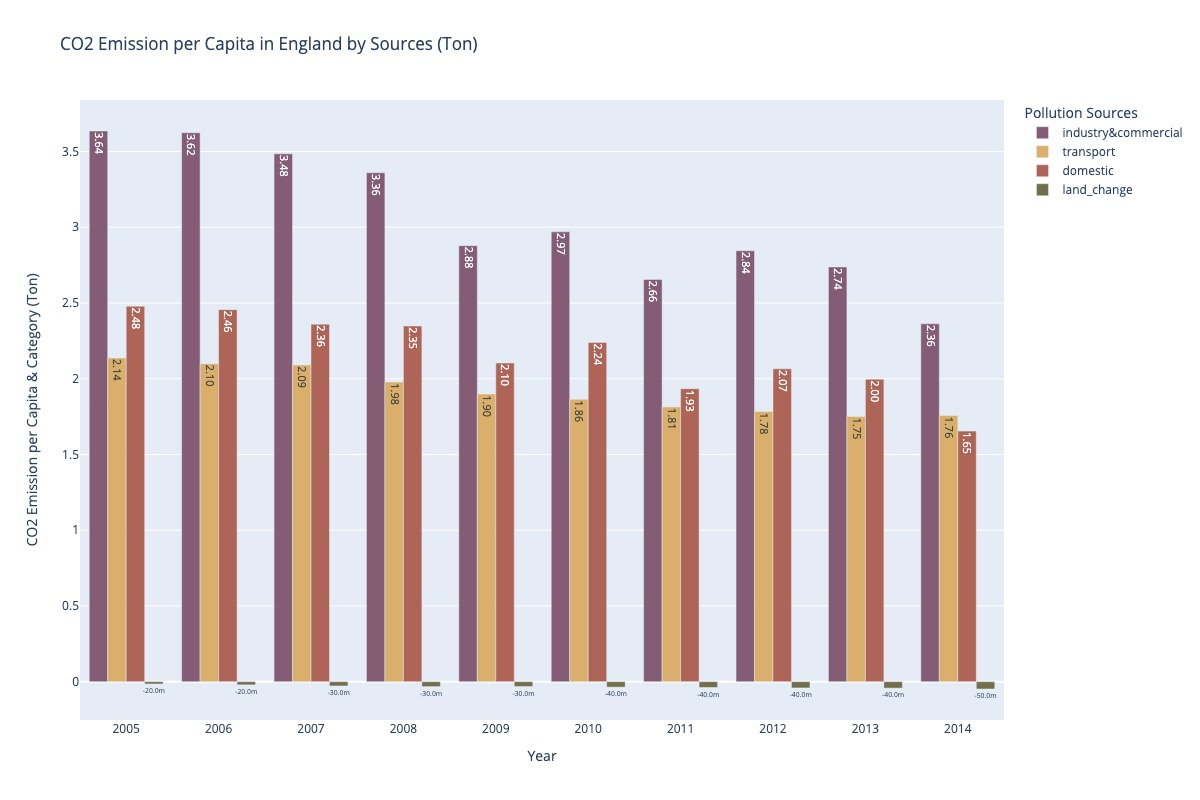

In [55]:
# Visualizing Emission per Capita, Year, and Pollution Source
df_temp2['rounded_value'] = df_temp2['emission_per_capita_per_variable'].round(2)
df_temp2 = (df_temp2
        .sort_values(['emission_per_capita_per_variable'],ascending=False)
        .sort_values(['year'],ascending=True))
fig = px.bar(df_temp2, x = 'year', y = 'emission_per_capita_per_variable',color = 'Pollution Sources', text='rounded_value',barmode = 'group',
             color_discrete_sequence=px.colors.qualitative.Antique,title = 'CO2 Emission per Capita in England by Sources (Ton)')
fig.update_xaxes(type='category',title='Year')
fig.update_yaxes(title='CO2 Emission per Capita & Category (Ton)')
fig.update_traces(texttemplate='%{text:.3s}', textfont=dict(size=6000))
fig.show('jpg',width=1200,height=800)

TAKEAWAYS:
- After dive deeper on pollution source, decrement in emission per capita mostly contributed by Industry & Commercial with 1.28 ton decrease over 9 years.
- Domestic/household & Transport emission source also contributed decrement by 0.83 ton & 0.38 ton per capita respectively. 
- Biggest emission decrement on 2009 that we see on first figure, mostly contributed by Industry & Commercial by 0.48 ton reduction per capita.

In [42]:
# Grouping Emission per Capita per Year & City
df_temp3 = df.groupby(by=['year','city'],as_index=False)[['total_pollution','population']].sum()
df_temp3['emission_per_capita_per_city'] = df_temp3['total_pollution']/df_temp3['population']*1000 # Convert from kiloton to ton
df_temp3 = df_temp3[df_temp3['city'].isin(['City of London','Westminster','North East'])]
dfc.head()

,Year,City,Total_Pollution,Population,Emission_per_Capita_per_City,rounded_value
48,2006,City of London,1765.311507,7254,243.356976,243.4
6,2005,City of London,1632.134854,7131,228.878818,228.9
132,2008,City of London,1683.706823,7429,226.639766,226.6
216,2010,City of London,1630.400534,7338,222.185954,222.2
90,2007,City of London,1665.452824,7607,218.936877,218.9


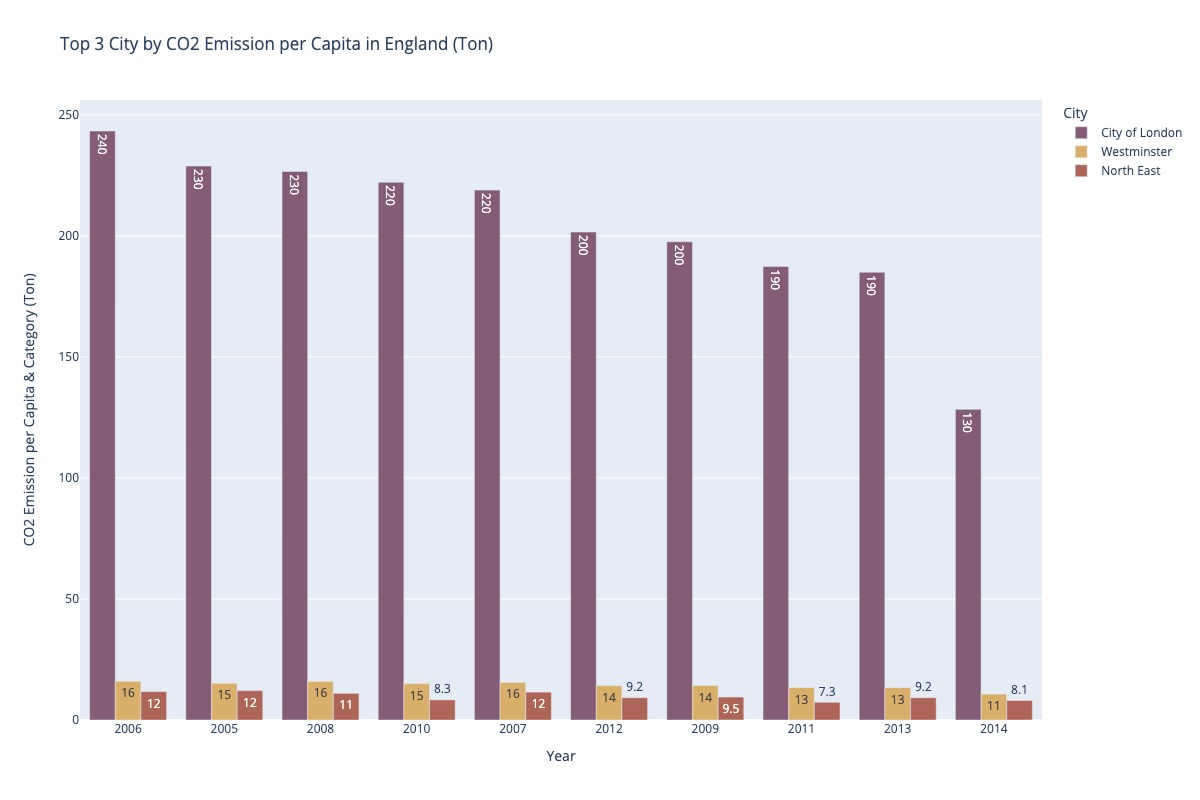

In [57]:
# Visualizing Emission per Capita, Year, and City
df_temp3['rounded_value'] = df_temp3['emission_per_capita_per_city'].round(1)
df_temp3 = df_temp3.sort_values('emission_per_capita_per_city',ascending=False)
fig = px.bar(df_temp3, x = 'year', y = 'emission_per_capita_per_city',color = 'city', text='rounded_value',barmode = 'group',
             color_discrete_sequence=px.colors.qualitative.Antique,title = 'Top 3 City by CO2 Emission per Capita in England (Ton)')
fig.update_xaxes(type='category',title='Year')
fig.update_yaxes(title='CO2 Emission per Capita & Category (Ton)')
fig.update_traces(texttemplate='%{text:.2s}', textfont=dict(size=12))
fig.update_layout(legend_title_text='City')
fig.show('jpg',width=1200,height=800)

TAKEAWAYS:
- City of London, Westminster, & North East became top 3 biggest CO2 Emission per Capita in England.
- Emission per Capita in City of London has 15x higher than Westminster in 2006 then decrease to 11x higher than Westminster in 2014.

In [60]:
# Grouping Emission per Capita for City of London
df_temp4 = df[df['city'] == 'City of London']
df_temp4 = df_temp4.melt(id_vars=['year','population'], value_vars=['pollution_domestic',
                      'pollution_transport',
                      'pollution_industry&commercial',
                      'pollution_land_change'])
df_temp4 = df_temp4.groupby(by=['year','variable'],as_index=False).sum()
df_temp4['emission_per_capita'] = df_temp4['value']/df_temp4['population']*1000 # Convert from kiloton to ton 
df_temp4 = df_temp4.sort_values('emission_per_capita',ascending=False)
df_temp4 = df_temp4.rename(columns={'variable': 'Pollution Sources'})
df_temp4['Pollution Sources'] = df_temp4['Pollution Sources'].str[10:]
df_temp4.head()

,year,Pollution Sources,population,value,emission_per_capita
5,2006,industry&commercial,7254,1679.706582,231.555911
1,2005,industry&commercial,7131,1546.381669,216.853410
13,2008,industry&commercial,7429,1603.958736,215.905066
21,2010,industry&commercial,7338,1554.734654,211.874442
9,2007,industry&commercial,7607,1580.466758,207.764790


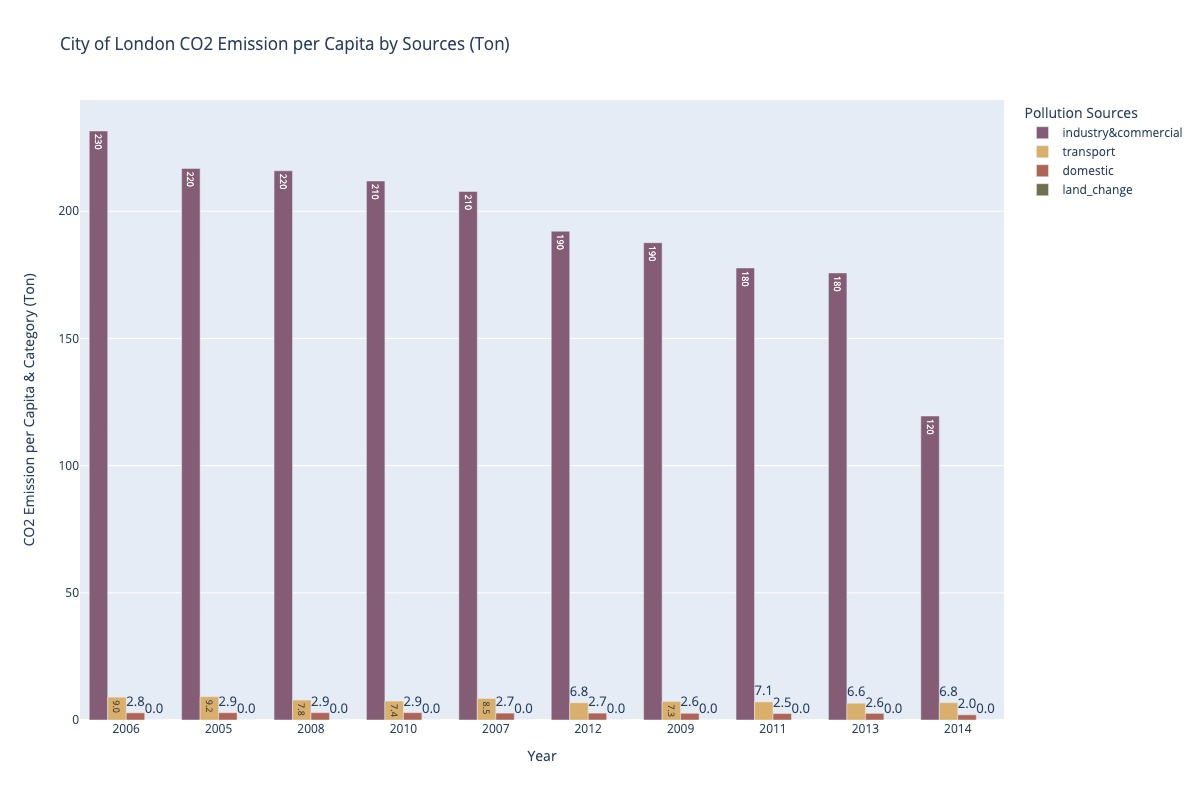

In [65]:
# Visualizing Emission per Capita, Year, and Pollution Source
df_temp4['rounded_value'] = df_temp4['emission_per_capita'].round(1)
fig = px.bar(df_temp4, x = 'year', y = 'emission_per_capita',color = 'Pollution Sources', text='rounded_value',barmode = 'group',
             color_discrete_sequence=px.colors.qualitative.Antique,title = 'City of London CO2 Emission per Capita by Sources (Ton)')
fig.update_xaxes(type='category',title='Year')
fig.update_yaxes(title='CO2 Emission per Capita & Category (Ton)')
fig.update_traces(texttemplate='%{text:.2s}', textfont=dict(size=100))
fig.show('jpg',width=1200,height=800)

TAKEAWAYS:
- Most of the pollution in City of London comes from Industry & Commercial.
- Industry & Commercial sector in City of London emit 17.6x more CO2 than Transport sector in 2014. While on country level, Industry & Commercial sector only emit 1.34x more CO2 than Transport sector in 2014.